# Promising or Predatory? Online Education in Non-Profit and For-Profit Universities
## By Christian Michael Smith, Amber D. Villalobos (equal authors), Laura T. Hamilton, and Charlie Eaton 
## Coded by Amber D. Villalobos 

Source: Data are from the Beginning Postsecondary Students Longitudinal Study 12/17 (BPS) Restricted Use Dataset.

## Table 5 Conditional Point Estimates (with Standard Errors) of the Relationship between Online Attendance and Student Outcomes, BPS 12/17 Restricted Use Data

In [2]:
cd P:\pr-nces-rudl-18040008\HERElab\repositories\predatory-inclusion-in-online-ed\d_data

P:\pr-nces-rudl-18040008\HERElab\repositories\predatory-inclusion-in-online-ed\
> d_data


In [3]:
use mi_bps_vars_2022_rudl.dta, clear


In [4]:
quietly {
***ATES***
//       The code below produces average treatment effects
//       of online attendance on each of our four binary outcomes: 
//       ba: earned a ba by 2017
//       dflt: ever defaulted 
//       fbr:  ever experienced forbearance
//       borr:  ever borrowed a loan during undergrad 

*Loop for binary outcomes, unweighted, multiple imputation
foreach outcome in ba dflt dlq fbr borr {
    foreach sector in nonprofit forprofit both {
    
    
		    mi estimate, cmdok: teffects ipwra (`outcome' i.female i.RACE10 AGE ///
            i.pell pared10 act gpa10 i.commuter3 works10 i.everprivate10 ///
            i.highestdegree i.HBCU , logit) (everonline10  i.female i.RACE10 AGE ///
            i.pell pared10 act gpa10 i.commuter3 works10 i.everprivate10///
            i.highestdegree i.HBCU , logit) if `sector'==1, vce(cluster cluster9)
			display "Outcome:  `outcome',  Sector:  `sector',  Weight:  Unweighted,  Technique: MI"
			qui matrix rtable = r(table)
			qui scalar b_`outcome'_`sector'_nowgt_mi = round(rtable["b","ATE:r1vs0.everonline10"],.01)
			qui scalar se_`outcome'_`sector'_nowgt_mi = round(rtable["se","ATE:r1vs0.everonline10"],.01)
			qui scalar p_`outcome'_`sector'_nowgt_mi = rtable["pvalue","ATE:r1vs0.everonline10"]
	}
}
}


. quietly {

. 


In [5]:
quietly {

//       The code below produces average treatment effects of online
//       attendance on each of our continuous outcomes for logged debt 

*Loop for continuous outcomes, unweighted, multiple imputation
foreach outcome in logdebt1 logdebt {
    foreach sector in nonprofit forprofit both {
		    mi estimate, cmdok: teffects ipwra (`outcome' i.female ///
            i.RACE10 AGE i.pell pared10 act gpa10 i.commuter3 works10 ///
            i.everprivate10 i.highestdegree i.HBCU , linear) (everonline10  ///
            i.female i.RACE10 AGE i.pell pared10 act gpa10 i.commuter3 works10 ///
            i.everprivate10 i.highestdegree i.HBCU , logit) if `sector'==1, vce(cluster cluster9)
			display "Outcome:  `outcome',  Sector:  `sector',  Weight:  Unweighted,  Technique: MI"
			qui matrix rtable = r(table)
			qui scalar b_`outcome'_`sector'_nowgt_mi = round(rtable["b","ATE:r1vs0.everonline10"],.01)
			qui scalar se_`outcome'_`sector'_nowgt_mi = round(rtable["se","ATE:r1vs0.everonline10"],.01)
			qui scalar p_`outcome'_`sector'_nowgt_mi = rtable["pvalue","ATE:r1vs0.everonline10"]
	}
}
}


. quietly {

. 


In [6]:
//     The following code displays the output used for Table 5 

*Compactly display selected estimates
foreach outcome in ba dflt dlq fbr borr logdebt logdebt1 {
    foreach sector in nonprofit forprofit both {
	    foreach technique in mi {
		    foreach wt in nowgt {
			    display "Outcome:  `outcome',  Sector:  `sector',  Weight:  `wt',  Technique:  `technique'"
			    display "ATE = " b_`outcome'_`sector'_`wt'_`technique'
				display "SE = " se_`outcome'_`sector'_`wt'_`technique'
				display "p-value = " p_`outcome'_`sector'_`wt'_`technique'
				display ""
				display ""
				display ""
			}
		}
	}
}


. 
. 
. //     The following code displays the output used for Table 5 
. 
. *Compactly display selected estimates
. foreach outcome in ba dflt dlq fbr borr logdebt logdebt1 {
  2.     foreach sector in nonprofit forprofit both {
  3.             foreach technique in mi {
  4.                     foreach wt in nowgt {
  5.                             display "Outcome:  `outcome',  Sector:  `secto
> r',  Weight:  `wt',  Technique:  `technique'"
  6.                             display "ATE = " b_`outcome'_`sector'_`wt'_`te
> chnique'
  7.                                 display "SE = " se_`outcome'_`sector'_`wt'
> _`technique'
  8.                                 display "p-value = " p_`outcome'_`sector'_
> `wt'_`technique'
  9.                                 display ""
 10.                                 display ""
 11.                                 display ""
 12.                         }
 13.                 }
 14.         }
 15. }
Outcome:  ba,  Sector:  nonprofit,  Weight:  n

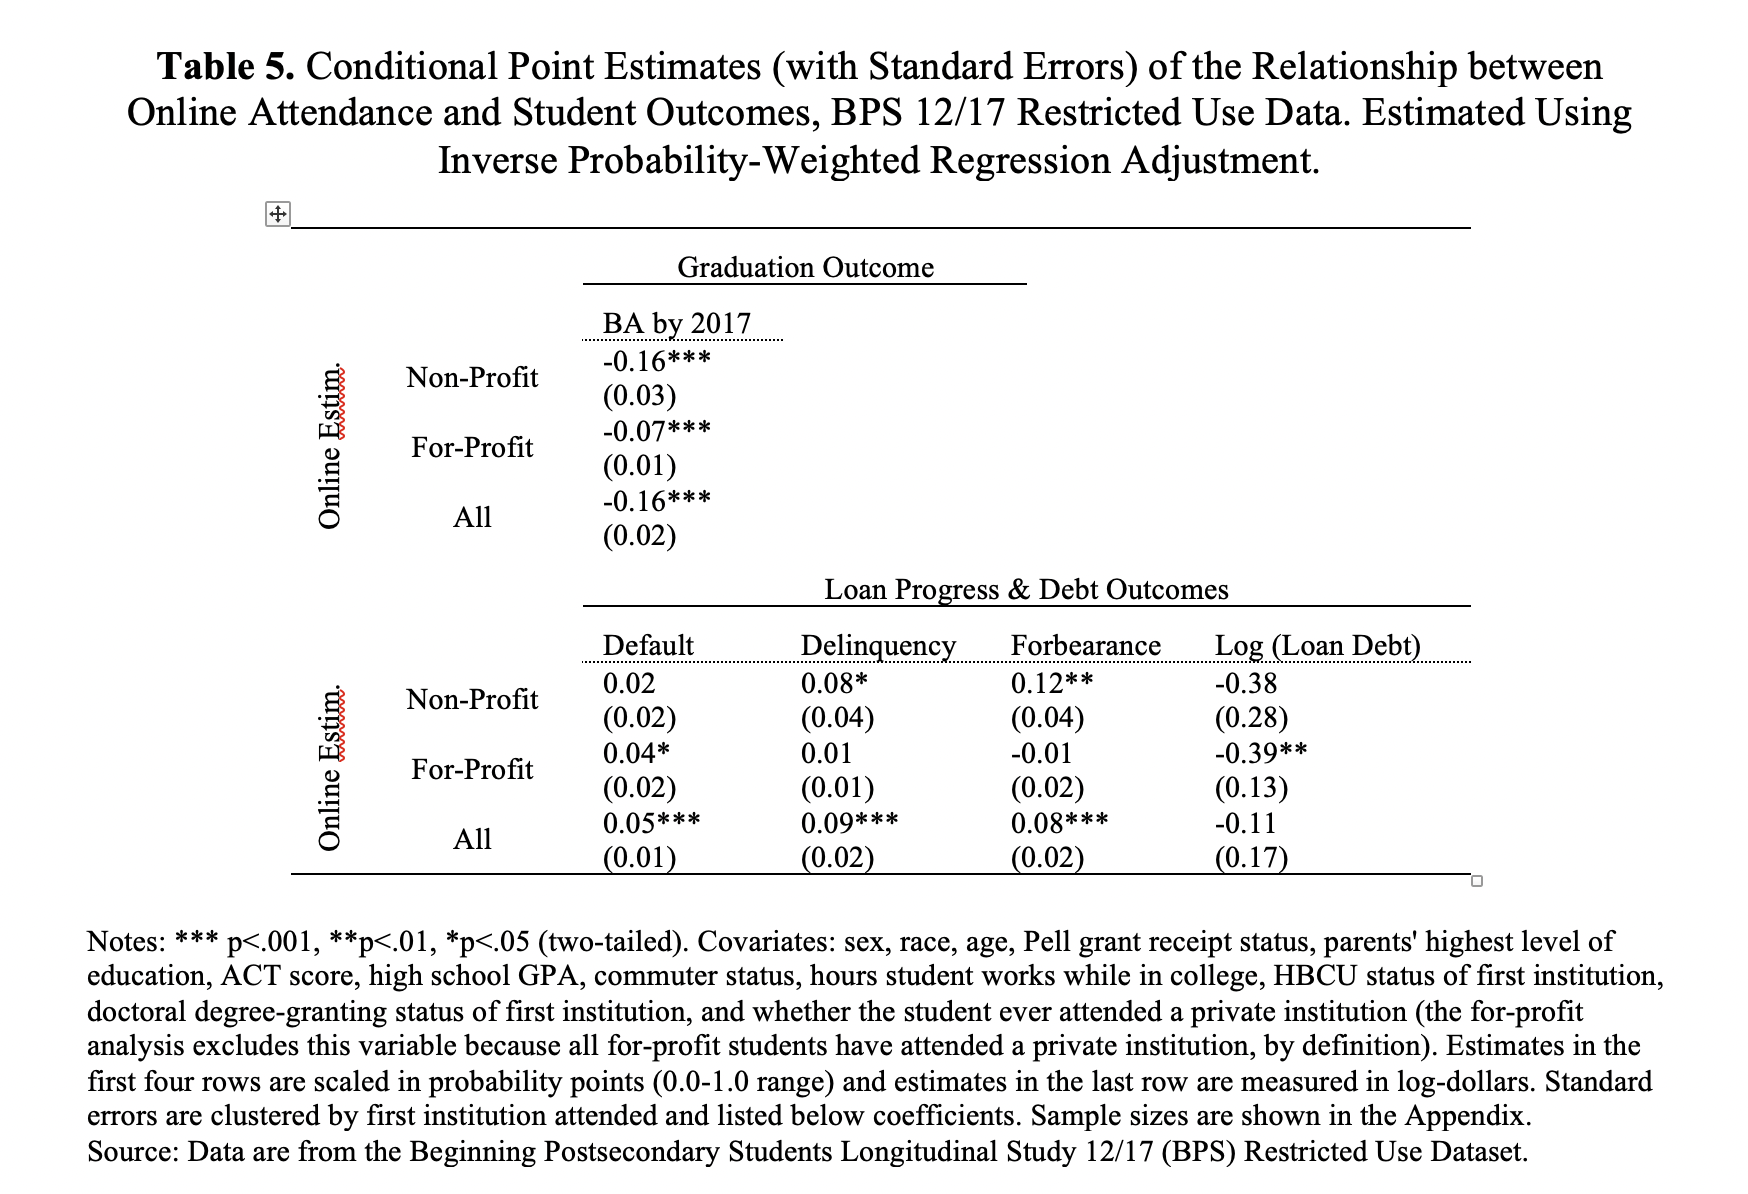